In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
%matplotlib inline
from datetime import datetime
from pandas.plotting import autocorrelation_plot

In [2]:
df=pd.read_csv('daily-min-temperatures.csv')
df.isnull().sum()

Date    0
Temp    0
dtype: int64

In [3]:
df.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


In [4]:
df['Date']=pd.to_datetime(df['Date'])

In [5]:
df.dtypes

Date    datetime64[ns]
Temp           float64
dtype: object

In [6]:
df.set_index('Date',inplace=True)
df

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


Text(0, 0.5, 'temp')

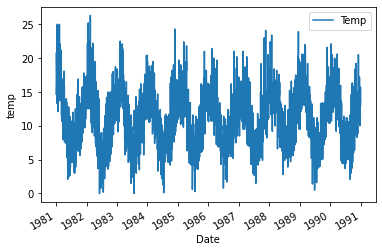

In [7]:
df.plot()
plt.xlabel('Date')
plt.ylabel('temp')

In [8]:
test_result=adfuller(df['Temp'])
test_result

(-4.444804924611687,
 0.00024708263003611164,
 20,
 3629,
 {'1%': -3.4321532327220154,
  '5%': -2.862336767636517,
  '10%': -2.56719413172842},
 16642.822304301197)

In [9]:
def adfuller_test(temp):
    result=adfuller(temp)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("accept null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [10]:
adfuller_test(df['Temp'])

ADF Test Statistic : -4.444804924611687
p-value : 0.00024708263003611164
#Lags Used : 20
Number of Observations Used : 3629
reject the null hypothesis. Data has no unit root and is stationary


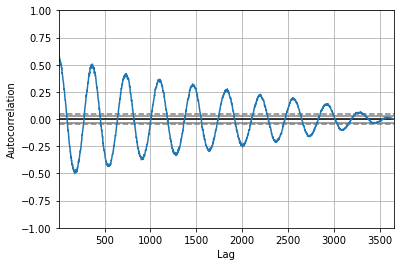

In [11]:
autocorrelation_plot(df['Temp'])
plt.show()

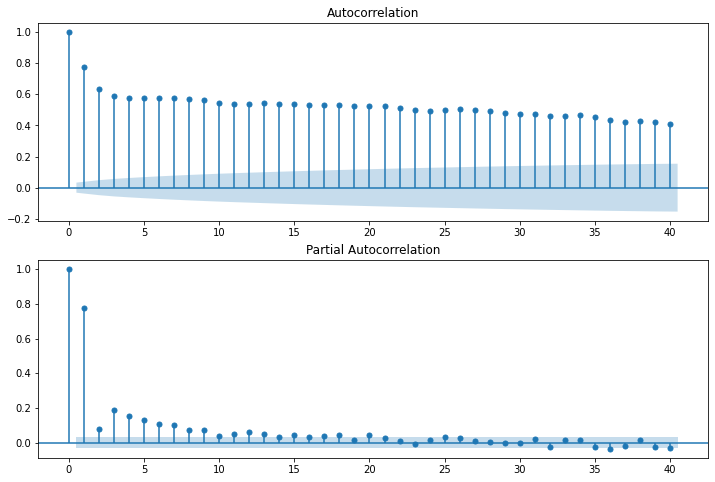

In [12]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Temp'].iloc[:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Temp'].iloc[:],lags=40,ax=ax2)

In [13]:
model=ARIMA(df['Temp'],order=(2,0,2))
model_fit=model.fit()

C:\Users\91984\anaconda3\envs\time_series\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\91984\anaconda3\envs\time_series\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\91984\anaconda3\envs\time_series\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\91984\anaconda3\envs\time_series\lib\site-packages\statsmodels\tsa\statespace\sarimax

In [14]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Temp   No. Observations:                 3650
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -8384.568
Date:                Wed, 21 Apr 2021   AIC                          16781.136
Time:                        22:37:17   BIC                          16818.351
Sample:                             0   HQIC                         16794.389
                               - 3650                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4839      0.812     14.147      0.000       9.893      13.075
ar.L1          1.2365      0.040     30.766      0.000       1.158       1.315
ar.L2         -0.2421      0.040     -6.108      0.000      -0.320      -0.164
ma.L1         -0.6455      0.041    -15.934      0.000      -0.725      -0.566
ma.L2         -0.2306      0.031     -7.353      0.000      -0.292      -0.169
sigma2         5.7888      0.128     45.246      0.000       5.538       6.040
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                17.00
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.09
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

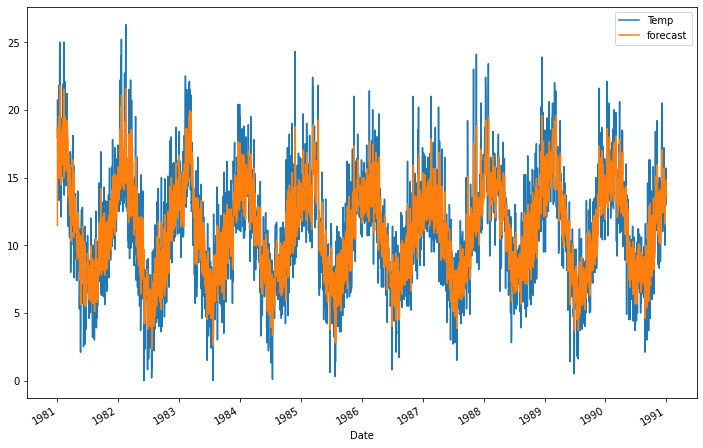

In [15]:
df['forecast']=model_fit.predict()
df[['Temp', 'forecast']].plot(figsize=(12,8))